In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url='http://bit.ly/drinksbycountry'

In [ ]:
pd.read_table(url)

,"country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent"
0,"Afghanistan,0,0,0,0.0,Asia"
1,"Albania,89,132,54,4.9,Europe"
2,"Algeria,25,0,14,0.7,Africa"
3,"Andorra,245,138,312,12.4,Europe"
4,"Angola,217,57,45,5.9,Africa"
...,...
188,"Venezuela,333,100,3,7.7,South America"
189,"Vietnam,111,2,1,2.0,Asia"
190,"Yemen,6,0,0,0.1,Asia"
191,"Zambia,32,19,4,2.5,Africa"


In [ ]:
pd.read_table(url,sep=',')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,South America
189,Vietnam,111,2,1,2.0,Asia
190,Yemen,6,0,0,0.1,Asia
191,Zambia,32,19,4,2.5,Africa


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/beer-servings.csv")

In [ ]:
data.head()

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa


In [ ]:
data.shape

(193, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    193 non-null    int64  
 1   country                       193 non-null    object 
 2   beer_servings                 185 non-null    float64
 3   spirit_servings               185 non-null    float64
 4   wine_servings                 187 non-null    float64
 5   total_litres_of_pure_alcohol  192 non-null    float64
 6   continent                     193 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 10.7+ KB


In [ ]:
data.isna().sum()

Unnamed: 0                      0
country                         0
beer_servings                   8
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [ ]:
data.dtypes

Unnamed: 0                        int64
country                          object
beer_servings                   float64
spirit_servings                 float64
wine_servings                   float64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

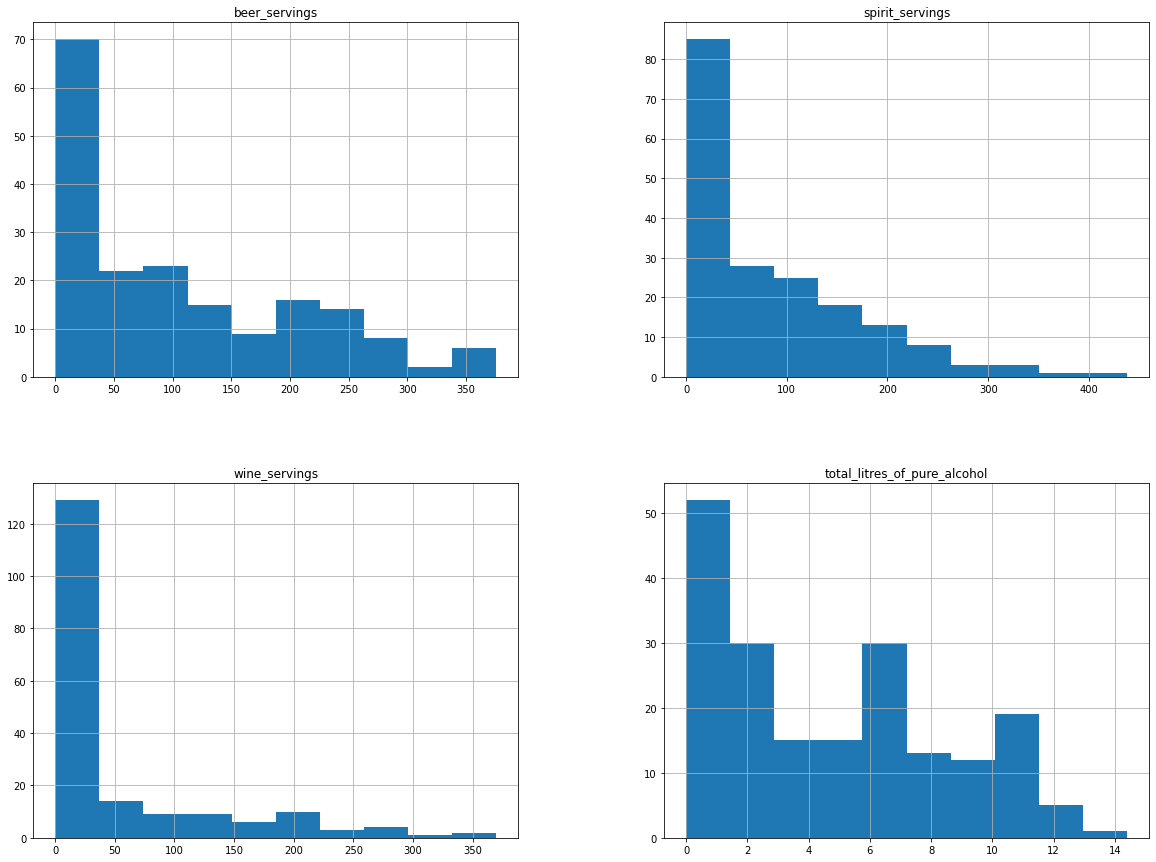

In [ ]:
dgraph=data.select_dtypes(include=['float'])
dgraph.hist(figsize=(20,15))
plt.show()

In [ ]:
data.columns

Index(['Unnamed: 0', 'country', 'beer_servings', 'spirit_servings',
       'wine_servings', 'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [ ]:
data['beer_servings']=data['beer_servings'].fillna(data['beer_servings'].median())
data.isna().sum()

Unnamed: 0                      0
country                         0
beer_servings                   0
spirit_servings                 8
wine_servings                   6
total_litres_of_pure_alcohol    1
continent                       0
dtype: int64

In [ ]:
for i in ['spirit_servings','wine_servings',
          'total_litres_of_pure_alcohol']:
  data[i]=data[i].fillna(data[i].median())

In [ ]:
data.isna().sum()

Unnamed: 0                      0
country                         0
beer_servings                   0
spirit_servings                 0
wine_servings                   0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64

In [ ]:
data.country.nunique()

193

In [ ]:
data.drop('country',axis=1, inplace=True)

In [ ]:
data.head()

,Unnamed: 0,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,0.0,0.0,0.0,0.0,Asia
1,1,89.0,132.0,54.0,4.9,Europe
2,2,25.0,0.0,14.0,0.7,Africa
3,3,245.0,138.0,312.0,12.4,Europe
4,4,217.0,57.0,45.0,5.9,Africa


Text(0.5, 1.0, 'Box plot of beer servings')

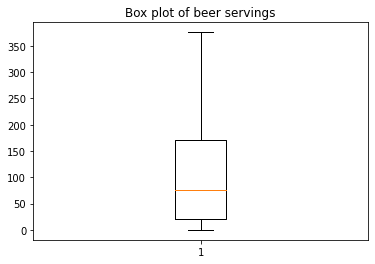

In [ ]:
plt.boxplot(data['beer_servings'])
plt.title('Box plot of beer servings')

{'boxes': [<matplotlib.lines.Line2D at 0x7fcef41b5fd0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fcef41bdf90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fcef41c6fd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fcef41c6a90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fcef41bd510>,
  <matplotlib.lines.Line2D at 0x7fcef41bda50>]}

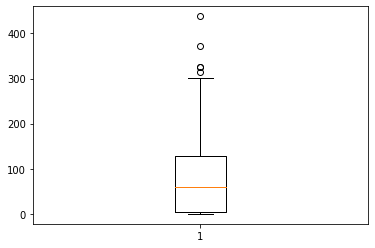

In [ ]:
plt.boxplot(data["spirit_servings"])

In [ ]:
q1=np.percentile(data["spirit_servings"],25,interpolation='midpoint')
q2=np.percentile(data["spirit_servings"],50,interpolation='midpoint')
q3=np.percentile(data['spirit_servings'],75,interpolation='midpoint')
print(q1)
print(q2)
print(q3)

5.0
60.0
128.0


In [ ]:
data['spirit_servings'].median()

60.0

In [ ]:
iqr = q3-q1
low_limit=q1-1.5*iqr
up_limit=q3+1.5*iqr
print(low_limit)
print(up_limit)

-179.5
312.5


In [ ]:
outlier=[]
for x in data['spirit_servings']:
  if((x>up_limit) or (x<low_limit)):
    outlier.append(x)
outlier

[373.0, 438.0, 326.0, 326.0, 315.0]

In [ ]:
ind1=data['spirit_servings']>up_limit
data.loc[ind1].index

Int64Index([15, 68, 73, 141, 144], dtype='int64')

In [ ]:
data.drop([15,68,73,141,144],inplace=True)

Text(0.5, 1.0, 'box plot of beer servings')

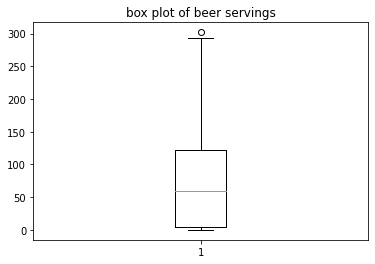

In [ ]:
plt.boxplot(data['spirit_servings'])
plt.title("box plot of beer servings")

In [ ]:
q1=np.percentile(data["wine_servings"],25,interpolation='midpoint')
q2=np.percentile(data["wine_servings"],50,interpolation='midpoint')
q3=np.percentile(data['wine_servings'],75,interpolation='midpoint')
iqr=q3-q1
low_limit=q1-1.5*iqr
up_limit=q3+1.5*iqr
print(low_limit)
print(up_limit)

-83.75
142.25


In [ ]:
outlier=[]
for x in data['wine_servings']:
  if((x>up_limit) or (x<low_limit)):
    outlier.append(x)
outlier

[312.0,
 221.0,
 212.0,
 191.0,
 212.0,
 172.0,
 254.0,
 278.0,
 233.0,
 370.0,
 149.0,
 175.0,
 218.0,
 185.0,
 165.0,
 237.0,
 271.0,
 190.0,
 175.0,
 339.0,
 167.0,
 276.0,
 186.0,
 280.0,
 195.0,
 220.0]

In [ ]:
ind1=data['wine_servings']>up_limit
data.loc[ind1].index

Int64Index([  3,   6,   8,   9,  16,  35,  42,  48,  55,  61,  64,  65,  67,
             75,  81,  83,  99, 120, 121, 136, 140, 156, 165, 166, 182, 185],
           dtype='int64')

In [ ]:
data.drop([3,6,8,9,16,35,42,48,55,61,64,65,67,
          75,81,83,99,120,121,136,140,156,165,166,182,185], inplace=True)

Text(0.5, 1.0, 'box plot of beer servings')

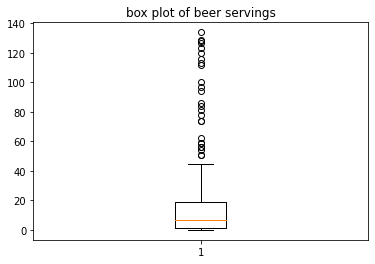

In [ ]:
plt.boxplot(data['wine_servings'])
plt.title("box plot of beer servings")

Text(0.5, 1.0, 'Box plot of total_litres_of_pure_alcohol')

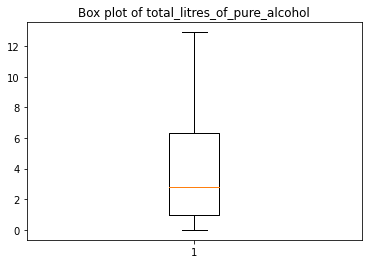

In [ ]:
plt.boxplot(data['total_litres_of_pure_alcohol'])
plt.title('Box plot of total_litres_of_pure_alcohol')

In [ ]:
data.shape

(162, 6)

In [ ]:
data.continent.nunique()

6

In [ ]:
data=pd.get_dummies(data)
data.head()

,Unnamed: 0,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,0,0.0,0.0,0.0,0.0,0,1,0,0,0,0
1,1,89.0,132.0,54.0,4.9,0,0,1,0,0,0
2,2,25.0,0.0,14.0,0.7,1,0,0,0,0,0
4,4,217.0,57.0,45.0,5.9,1,0,0,0,0,0
5,5,102.0,128.0,45.0,4.9,0,0,0,1,0,0


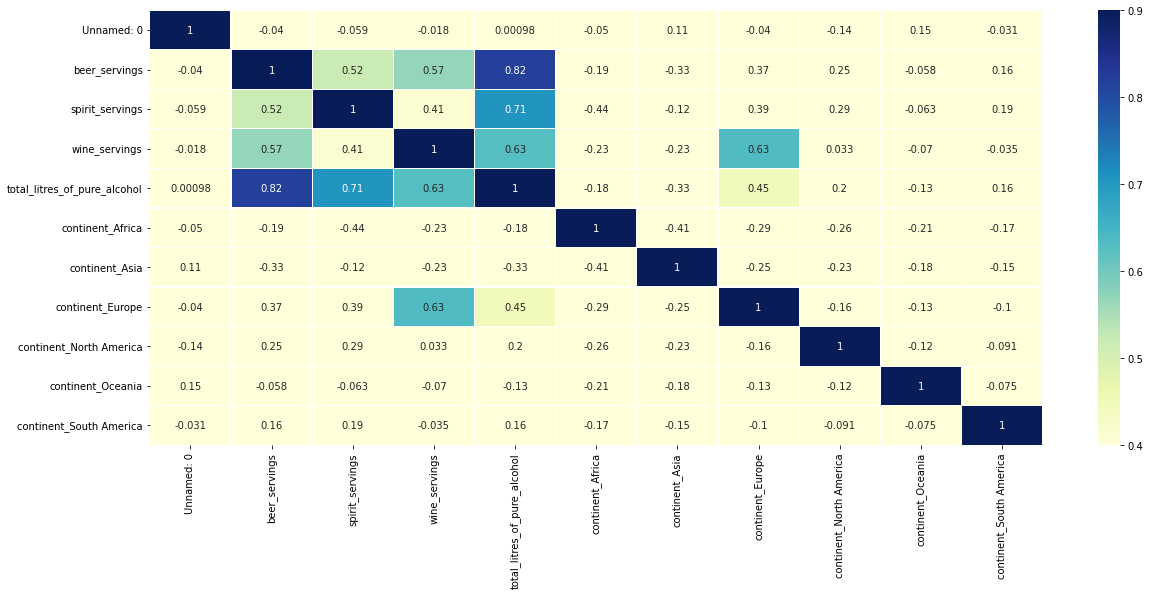

In [ ]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.4,vmax=0.9,annot=True,linewidth=0.2,cmap='YlGnBu')

In [ ]:
data.columns
y=data['total_litres_of_pure_alcohol']
X=data.drop("total_litres_of_pure_alcohol", axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [ ]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
prediction=model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
print("MSC is:",mean_squared_error(y_test,prediction))

MSC is: 1.4396973594664204


In [ ]:
from sklearn.metrics import r2_score
print('R squared value is :',r2_score(y_test,prediction))

R squared value is : 0.8380927551622365


In [ ]:
X.describe()

,Unnamed: 0,beer_servings,spirit_servings,wine_servings,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,98.141975,86.592593,72.240741,20.598765,0.320988,0.265432,0.148148,0.123457,0.086420,0.055556
std,55.662678,91.963911,79.305981,33.331473,0.468304,0.442932,0.356348,0.329981,0.281854,0.229772
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.250000,17.250000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,100.500000,54.500000,43.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,146.750000,127.000000,120.750000,18.750000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,192.000000,376.000000,302.000000,134.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
from sklearn import preprocessing
standards=preprocessing.StandardScaler()
X=standards.fit_transform(X)

In [ ]:
X.describe

AttributeError: ignored

In [ ]:
X=pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5,6,7,8,9
count,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02,1.620000e+02
mean,1.274701e-16,-4.403199e-17,-1.117076e-16,9.594520e-18,6.579099e-17,-1.672188e-16,5.962309e-17,1.706454e-16,3.289550e-16,-6.304970e-17
std,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00,1.003101e+00
min,-1.768623e+00,-9.445129e-01,-9.137362e-01,-6.199137e-01,-6.875517e-01,-6.011194e-01,-4.170288e-01,-3.752933e-01,-3.075623e-01,-2.425356e-01
25%,-8.810855e-01,-7.563577e-01,-8.757907e-01,-5.898190e-01,-6.875517e-01,-6.011194e-01,-4.170288e-01,-3.752933e-01,-3.075623e-01,-2.425356e-01
50%,4.249412e-02,-3.500515e-01,-3.698512e-01,-4.092508e-01,-6.875517e-01,-6.011194e-01,-4.170288e-01,-3.752933e-01,-3.075623e-01,-2.425356e-01
75%,8.759684e-01,4.407457e-01,6.135688e-01,-5.563805e-02,1.454436e+00,1.663563e+00,-4.170288e-01,-3.752933e-01,-3.075623e-01,-2.425356e-01
max,1.691422e+00,3.156725e+00,2.906107e+00,3.412777e+00,1.454436e+00,1.663563e+00,2.397916e+00,2.664583e+00,3.251373e+00,4.123106e+00


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42, test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
prediction=model.predict(X_test)
print('MSC IS:',mean_squared_error(y_test,prediction))
print('R squared value is :', r2_score(y_test,prediction))

MSC IS: 1.4396973594664244
R squared value is : 0.838092755162236


In [ ]:
  X=data.drop('total_litres_of_pure_alcohol',axis=1)
  X.describe()

,Unnamed: 0,beer_servings,spirit_servings,wine_servings,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,98.141975,86.592593,72.240741,20.598765,0.320988,0.265432,0.148148,0.123457,0.086420,0.055556
std,55.662678,91.963911,79.305981,33.331473,0.468304,0.442932,0.356348,0.329981,0.281854,0.229772
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.250000,17.250000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,100.500000,54.500000,43.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,146.750000,127.000000,120.750000,18.750000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,192.000000,376.000000,302.000000,134.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
X=min_max.fit_transform(X)
X=pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5,6,7,8,9
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,0.511156,0.230299,0.239208,0.153722,0.320988,0.265432,0.148148,0.123457,0.086420,0.055556
std,0.289910,0.244585,0.262603,0.248742,0.468304,0.442932,0.356348,0.329981,0.281854,0.229772
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.256510,0.045878,0.009934,0.007463,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.523438,0.144947,0.142384,0.052239,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.764323,0.337766,0.399834,0.139925,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
prediction=model.predict(X_test)
print('MSC IS:', mean_squared_error(y_test,prediction))
print('R squared value is:',r2_score(y_test,prediction))

MSC IS: 1.4396973594664246
R squared value is: 0.838092755162236


In [ ]:
X=data.drop('total_litres_of_pure_alcohol', axis=1)
X.describe()

,Unnamed: 0,beer_servings,spirit_servings,wine_servings,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,98.141975,86.592593,72.240741,20.598765,0.320988,0.265432,0.148148,0.123457,0.086420,0.055556
std,55.662678,91.963911,79.305981,33.331473,0.468304,0.442932,0.356348,0.329981,0.281854,0.229772
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,49.250000,17.250000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,100.500000,54.500000,43.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,146.750000,127.000000,120.750000,18.750000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,192.000000,376.000000,302.000000,134.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
X=preprocessing.normalize(X)

In [ ]:
X=pd.DataFrame(X)
X.describe()

,0,1,2,3,4,5,6,7,8,9
count,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000,162.000000
mean,0.625060,0.416522,0.333343,0.093542,0.003431,0.008424,0.000696,0.000610,0.000551,0.000258
std,0.332288,0.300971,0.304307,0.134146,0.006441,0.078540,0.002150,0.001773,0.001915,0.001142
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.337111,0.126038,0.038336,0.008218,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.661774,0.391064,0.268018,0.038110,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.954719,0.656063,0.595310,0.117155,0.005500,0.003970,0.000000,0.000000,0.000000,0.000000
max,0.999980,0.978089,0.990584,0.742555,0.034794,1.000000,0.019306,0.009812,0.010249,0.008794


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
prediction=model.predict(X_test)
print('MSC IS:', mean_squared_error(y_test,prediction))
print('R squared value is:',r2_score(y_test,prediction))

MSC IS: 4.3784472861367165
R squared value is: 0.5076032250079895


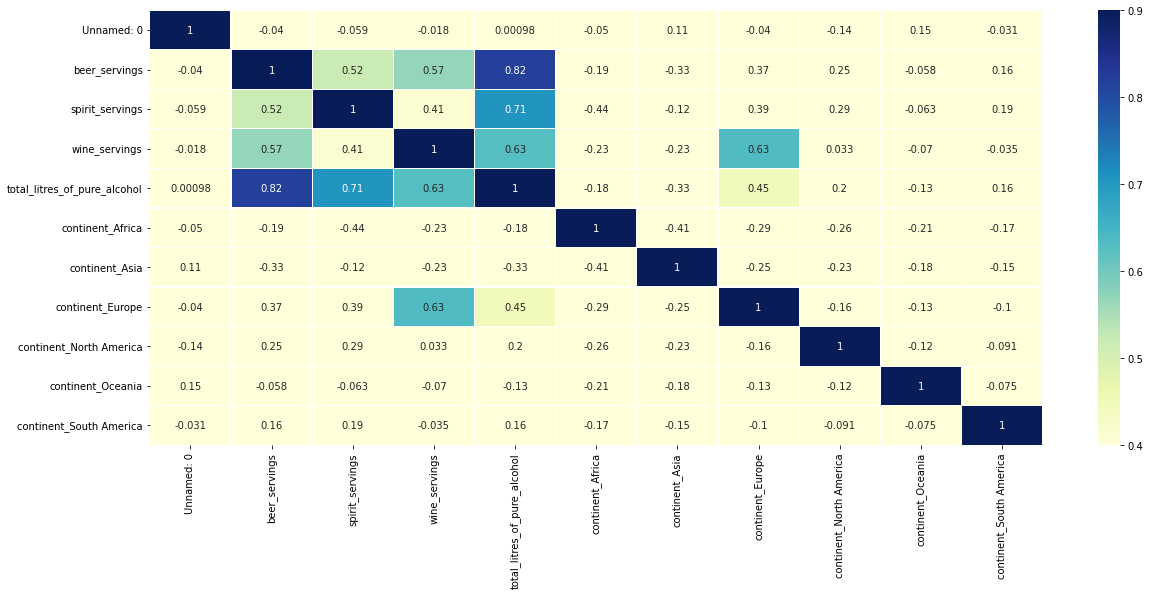

In [ ]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=0.4,vmax=0.9,annot=True,linewidth=0.2,cmap='YlGnBu')

In [ ]:
data.columns

Index(['Unnamed: 0', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent_Africa', 'continent_Asia',
       'continent_Europe', 'continent_North America', 'continent_Oceania',
       'continent_South America'],
      dtype='object')

In [ ]:
data.drop(['spirit_servings','wine_servings'],axis=1,inplace=True)

In [ ]:
y=data['total_litres_of_pure_alcohol']
X=data.drop('total_litres_of_pure_alcohol', axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(X_train,y_train)
prediction=model.predict(X_test)
print('MSC IS:', mean_squared_error(y_test,prediction))
print('R squared value is:',r2_score(y_test,prediction))


MSC IS: 2.9859990483878778
R squared value is: 0.6641968703812565


In [ ]:
df1=pd.DataFrame({"anu":[80,95,65,32,105],
                 "abcd":[36,44,56,91,50],
                 "xyz":[87,45,12,64,45]},
                 index=[2009,2010,2011,2012,2013])

In [ ]:
df2=pd.DataFrame({"anu":[80,95,65,32,105],
                 "manju":[87,95,65,32,105],
                 "abcd":[36,44,56,91,50]},
                 index=[2005,2006,2007,2008,2009])

In [ ]:
pd.merge(df1,df2,on="anu")

,anu,abcd_x,xyz,manju,abcd_y
0,80,36,87,87,36
1,95,44,45,95,44
2,65,56,12,65,56
3,32,91,64,32,91
4,105,50,45,105,50


In [ ]:
df3=pd.DataFrame({"anu":[80,95,65,32,105],
                  "def":[87,45,12,64,45],
                  "ghi":[36,44,56,91,50]})

In [ ]:
df4=pd.DataFrame({"kim":[45,23,65,12,100],
                  "abc":[88,56,78,96,20,],
                  "xyz":[12,56,78,95,111]})

In [ ]:
join_date=df3.join(df4)

In [ ]:
join_date

,anu,def,ghi,kim,abc,xyz
0,80,87,36,45,88,12
1,95,45,44,23,56,56
2,65,12,56,65,78,78
3,32,64,91,12,96,95
4,105,45,50,100,20,111


In [ ]:


df5=pd.DataFrame({"anu":[12,45,63,12,78],
                  "uvw":[65,13,45,78,65],
                  "qrs":[78,95,65,45,14]})

In [ ]:
cancat_data=pd.concat([df4,df5],axis=1)

In [ ]:
cancat_data

,kim,abc,xyz,anu,uvw,qrs
0,45,88,12,12,65,78
1,23,56,56,45,13,95
2,65,78,78,63,45,65
3,12,96,95,12,78,45
4,100,20,111,78,65,14
